<a href="https://colab.research.google.com/github/Ayikoandrew/ml-class/blob/main/coursework_fine_tuning_mlp_on_fashion_mnist_to_cifar_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers, Sequential, ops
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def mlp(input_dim=28*28, hidden_dims=(256, 128)):
  model = Sequential([
    layers.Input((input_dim,)),
    layers.Dense(hidden_dims[0], activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(hidden_dims[1], activation='relu'),
    layers.Dense(10, activation='softmax')
])
  return model

def fashion_dataset():
  (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
  x_train = x_train.astype('float32') / 250.0
  x_test = x_test.astype('float32') / 250.0

  x_train = x_train.reshape((-1, 28*28))
  x_test = x_test.reshape((-1, 28*28))

  return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_dataset()
model = mlp()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10, batch_size=128)

model.save_weights('/tmp/.weights.h5')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.8410 - sparse_categorical_accuracy: 0.5575 - val_loss: 1.1197 - val_sparse_categorical_accuracy: 0.7472
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.0535 - sparse_categorical_accuracy: 0.7804 - val_loss: 0.9832 - val_sparse_categorical_accuracy: 0.7911
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.9393 - sparse_categorical_accuracy: 0.8150 - val_loss: 0.9189 - val_sparse_categorical_accuracy: 0.8137
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.8842 - sparse_categorical_accuracy: 0.8265 - val_loss: 0.8865 - val_sparse_categorical_accuracy: 0.8168
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.8481 - sparse_categorical_accuracy: 0.8358 - val_loss: 0.8630 - val_sparse_categorical_accuracy: 0.8249
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.8284 - sparse_categorical_accuracy: 0.8385 - val_loss: 0.8352 - val_sparse_categorical_accuracy: 0.8313
Ep

In [5]:
W, b = model.layers[1].get_weights()

In [6]:
print(f"Weights: {W.shape}")
print(f"Bias: {b.shape}")

Weights: (256, 128)
Bias: (128,)


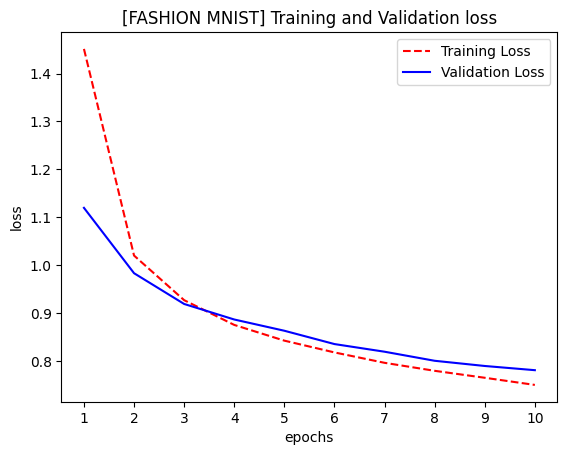

In [15]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("[FASHION MNIST] Training and Validation loss")
plt.xlabel("epochs")
plt.xticks(epochs)
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

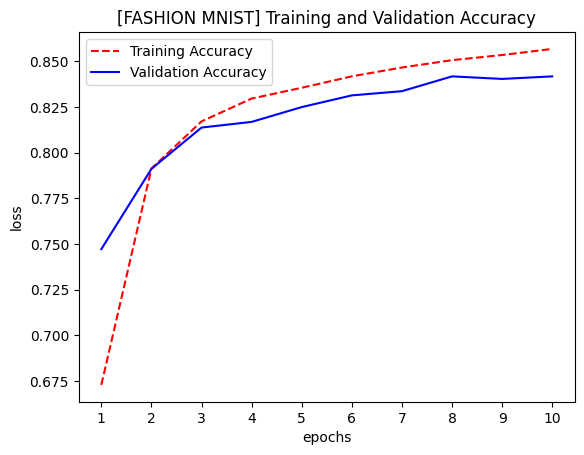

In [16]:
history_dict = history.history
loss = history_dict['sparse_categorical_accuracy']
val_loss = history_dict['val_sparse_categorical_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r--', label='Training Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Accuracy')
plt.title("[FASHION MNIST] Training and Validation Accuracy")
plt.xlabel("epochs")
plt.xticks(epochs)
plt.ylabel("loss")
plt.legend()
plt.show()

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [18]:
x_train = x_train.astype('float32') / 255.0
# y_train = y_train.astype('float32') / 255.0
print(f"x_train shape: {x_train.shape}")

x_train_gray = tf.image.rgb_to_grayscale(x_train).numpy()

x_train shape: (50000, 32, 32, 3)


In [19]:
x_train_resize = tf.image.resize(x_train_gray, [28, 28]).numpy()

In [20]:
x_train_resize.shape

(50000, 28, 28, 1)

In [21]:
x_train_resize = x_train_resize.reshape((-1, 28*28))

In [22]:
x_train_resize.shape

(50000, 784)

In [23]:
x_train = x_train_resize.reshape(-1)

In [24]:
x_train.shape

(39200000,)

In [25]:
def cifar_dataset():
  (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

  x_train = x_train.astype('float32') / 255.0
  x_test = x_test.astype('float32') / 255.0

  x_train_gray = tf.image.rgb_to_grayscale(x_train).numpy()
  x_test_gray = tf.image.rgb_to_grayscale(x_test).numpy()

  x_train_resized = tf.image.resize(x_train_gray, [28, 28]).numpy()
  x_test_resized = tf.image.resize(x_test_gray, [28, 28]).numpy()

  x_train_resized = x_train_resized.reshape((-1, 28*28))
  x_test_resized = x_test_resized.reshape((-1, 28*28))

  y_train = y_train.reshape(-1)
  y_test = y_test.reshape(-1)

  return (x_train_resized, y_train), (x_test_resized, y_test)

In [26]:
(x_train, y_train), (x_test, y_test) = cifar_dataset()

In [27]:
ft_model = mlp()

In [28]:
ft_model.layers[1].get_weights()

[array([[-0.08385813, -0.03555116,  0.04128778, ...,  0.02968189,
         -0.04693362,  0.01076791],
        [-0.12125793, -0.0279249 , -0.08981371, ..., -0.04671472,
          0.07628939,  0.04408827],
        [-0.02347258,  0.05054036, -0.06428981, ...,  0.11681238,
          0.01378006, -0.0331091 ],
        ...,
        [-0.11494711,  0.02823335, -0.10349783, ...,  0.08607495,
          0.08171177,  0.11704087],
        [ 0.08981055, -0.08007172, -0.02448007, ..., -0.0707756 ,
          0.1180768 ,  0.04072258],
        [ 0.07978716, -0.09353712, -0.01858142, ..., -0.0477744 ,
         -0.07536265,  0.11103693]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [29]:
ft_model.load_weights('/tmp/.weights.h5')

In [ ]:
ft_model.layers[1].get_weights()

[array([[ 0.03434411, -0.03443861,  0.08959075, ..., -0.02217357,
          0.07673009, -0.11796346],
        [ 0.02318855,  0.10834935,  0.14606544, ..., -0.11487565,
         -0.06376428, -0.13029431],
        [ 0.05389494,  0.18546183, -0.07900546, ..., -0.06508492,
         -0.06195594, -0.08181596],
        ...,
        [ 0.08780394,  0.04196875, -0.04218616, ..., -0.10276429,
         -0.16356161, -0.02238669],
        [-0.05525121, -0.1537146 ,  0.31245917, ..., -0.03907457,
          0.03914418,  0.05538815],
        [ 0.04703741, -0.06383467, -0.07385908, ...,  0.01109628,
          0.05836408, -0.1605195 ]], dtype=float32),
 array([ 0.11409788,  0.16523975,  0.2646797 ,  0.15621093,  0.03972175,
         0.04019986,  0.06004995,  0.13056207,  0.121665  ,  0.07278367,
         0.17211519, -0.01530105, -0.02291001,  0.2140576 ,  0.06714506,
         0.17712021, -0.00613714,  0.22904041,  0.03844443, -0.00042906,
        -0.03920065,  0.07195386, -0.02161425,  0.1332667 , -0.033

In [30]:
ft_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [31]:
history = ft_model.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 4.6625 - sparse_categorical_accuracy: 0.1661 - val_loss: 2.1926 - val_sparse_categorical_accuracy: 0.2157
Epoch 2/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.1051 - sparse_categorical_accuracy: 0.2439 - val_loss: 2.0106 - val_sparse_categorical_accuracy: 0.2884
Epoch 3/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.0303 - sparse_categorical_accuracy: 0.2766 - val_loss: 1.9903 - val_sparse_categorical_accuracy: 0.2997
Epoch 4/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 2.0113 - sparse_categorical_accuracy: 0.2859 - val_loss: 1.9655 - val_sparse_categorical_accuracy: 0.3109
Epoch 5/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.9960 - sparse_categorical_accuracy: 0.2909 - val_loss: 1.9436 - val_sparse_categorical_accuracy: 0.3190
Epoch 6/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.9941 - sparse_categorical_accuracy: 0.2966 - val_loss: 1.9678 - val_sparse_categorical_accuracy: 0.3120
Epoch 7

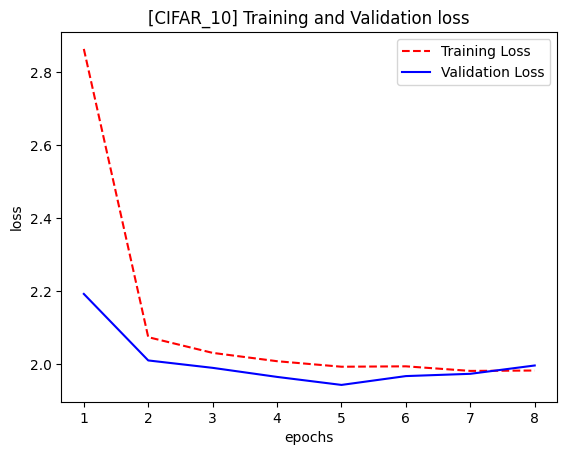

In [32]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r--', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("[CIFAR_10] Training and Validation loss")
plt.xlabel("epochs")
plt.xticks(epochs)
plt.ylabel("loss")
plt.legend()
plt.show()

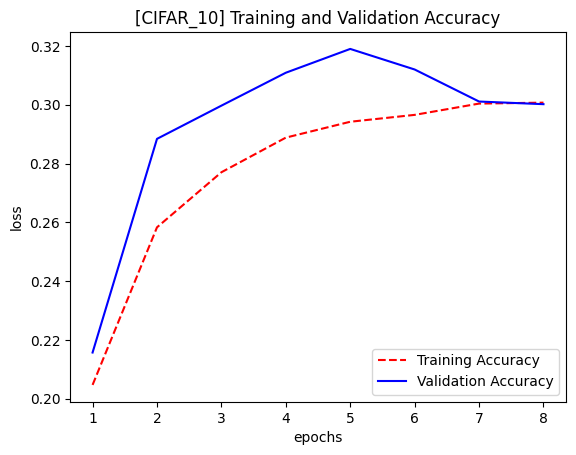

In [33]:
history_dict = history.history
loss = history_dict['sparse_categorical_accuracy']
val_loss = history_dict['val_sparse_categorical_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r--', label='Training Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Accuracy')
plt.title("[CIFAR_10] Training and Validation Accuracy")
plt.xlabel("epochs")
plt.xticks(epochs)
plt.ylabel("loss")
plt.legend()
plt.show()

In [34]:
W, b = ft_model.layers[1].get_weights()

# USING PYTORCH

In [10]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

100%|██████████| 26.4M/26.4M [00:00<00:00, 122MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.98MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 66.6MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.8MB/s]


Ankle boot Sandal T-shirt/top Ankle boot


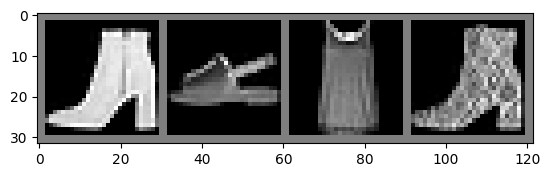

In [2]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(root='./data', download=True, transform=transforms, train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', download=True, transform=transforms, train=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

In [3]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [4]:
mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

In [5]:
for epoch in range(2):

    running_loss = 0.0

    for i, data in enumerate(trainloader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print("Training finished")

[1,  2000] loss: 0.849
[1,  4000] loss: 0.550
[1,  6000] loss: 0.504
[1,  8000] loss: 0.467
[1, 10000] loss: 0.449
[1, 12000] loss: 0.425
[1, 14000] loss: 0.419
[2,  2000] loss: 0.402
[2,  4000] loss: 0.372
[2,  6000] loss: 0.394
[2,  8000] loss: 0.372
[2, 10000] loss: 0.394
[2, 12000] loss: 0.363
[2, 14000] loss: 0.359
Training finished


In [6]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = mlp(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


In [7]:
torch.save(mlp.state_dict(), "mlp_weights.pt")

In [8]:
model = MLP()
model.load_state_dict(torch.load('mlp_weights.pt'))

<All keys matched successfully>

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),
    transforms.Resize((28, 28))
])

trainset = torchvision.datasets.CIFAR10(root='./data', download=True, transform=transform, train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', download=True, transform=transform, train=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# def imshow(img):
#     img = img / 2 + 0.5
#     nping = img.numpy()
#     plt.imshow(np.transpose(nping, (1, 2, 0)))

# dataiter = iter(trainloader)
# images, labels = next(dataiter)

# imshow(torchvision.utils.make_grid(images))
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

100%|██████████| 170M/170M [00:05<00:00, 29.5MB/s]


In [12]:
for param in model.fc1.parameters():
    param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)

In [13]:
for epoch in range(2):

    running_loss = 0.0

    for i, data in enumerate(trainloader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    scheduler.step()

print("Training finished")

Training finished


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 33 %


*So I have been working on this problem and trying to make the model have better predictions and my target was for the model to hit 50% accuracy and as you can see it is quite hard. The accuracy I have got in over 5 iterations with new learning rates and trying to freeze the first layer of the network, among other tricks I tried has got me to just 37% and it is the best accuracy I have got. Though the current accuracy as you can see above is 33% but you can still work to make it better. Below is the evidence of the best accuracy I got😅😅*

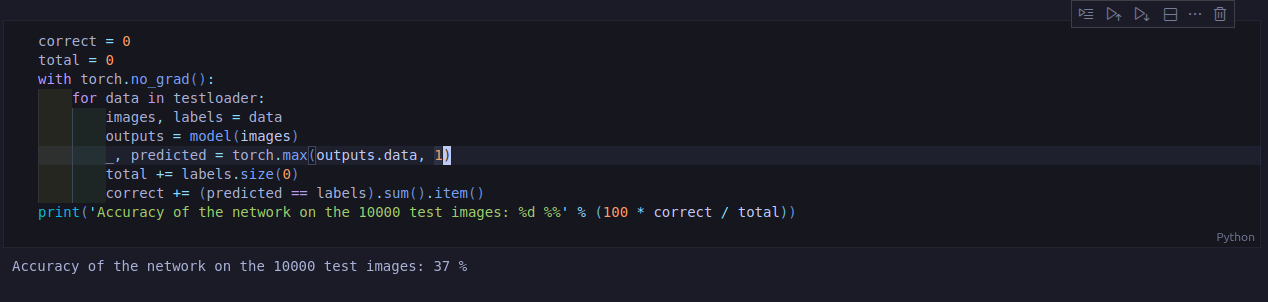